# Fisher classifier

The Fisher classifier use the linear discriminant analysis to classify the object into a class. The main idea of this classifier is to use the LDA to reduce the dimensionality and classify on the reduced feature space. In this notebook we use the Iris dataset to show how it works.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Loading the dataset with pandas
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We can easily

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

x = iris_df[['sepal width (cm)','sepal length (cm)']].values.reshape(-1, 2)

clf = LinearDiscriminantAnalysis()
clf.fit(x,iris_data.target)
LinearDiscriminantAnalysis()

print(clf.predict([[5.0, 3.5]]))

[0]


## Fisher's classifier from scratch

We can implement the Fisher's classifier calculating the mean values.

y_pred:  [5.74445884 5.85613937 5.81146716 5.83380326 5.72212273 5.65511441
 5.76679494 5.76679494 5.87847547 5.83380326 5.69978662 5.76679494
 5.85613937 5.85613937 5.63277831 5.54343388 5.65511441 5.74445884
 5.67745052 5.67745052 5.76679494 5.69978662 5.72212273 5.78913105
 5.76679494 5.85613937 5.76679494 5.74445884 5.76679494 5.81146716
 5.83380326 5.76679494 5.6104422  5.58810609 5.83380326 5.81146716
 5.74445884 5.72212273 5.85613937 5.76679494 5.74445884 6.01249211
 5.81146716 5.74445884 5.67745052 5.85613937 5.67745052 5.81146716
 5.69978662 5.78913105 5.81146716 5.81146716 5.83380326 6.01249211
 5.90081158 5.90081158 5.78913105 5.990156   5.87847547 5.92314769
 6.07950043 5.85613937 6.03482822 5.87847547 5.87847547 5.83380326
 5.85613937 5.92314769 6.03482822 5.9678199  5.81146716 5.90081158
 5.9678199  5.90081158 5.87847547 5.85613937 5.90081158 5.85613937
 5.87847547 5.94548379 5.990156   5.990156   5.92314769 5.92314769
 5.85613937 5.76679494 5.83380326 6.01249211 5.856139

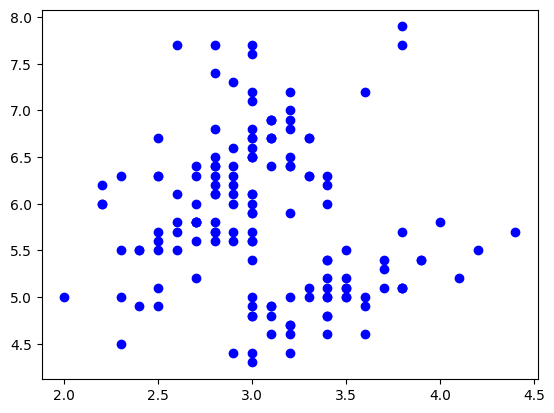

In [8]:
x = iris_df['sepal width (cm)'].values
y = iris_df['sepal length (cm)'].values

dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x


y_pred = a * x + b
print("y_pred: ", y_pred)
plt.scatter(x, y, color='blue', label='Data points')